# **Project Name** -Integrated Retail analysis for Store Optimization

# **Project Type** - Time Series Analysis

# **Contribution** - Individual

# **Project Summary** -
In this project, multiple datasets (sales, features, and store data) were merged to analyze weekly sales performance across different stores. Data preprocessing steps included date formatting and missing value handling. Exploratory data analysis was performed to investigate the impact of various features such as CPI, Fuel Price, Temperature, and Markdown values on weekly sales. PCA was used to combine Markdown features due to their similar distributions. Stationarity of the weekly sales time series was tested using the Augmented Dickey-Fuller test, which confirmed stationarit.

# **GitHub Link** -
https://github.com/siddharth1964/Siddharth-AI/tree/main


# **Problem Statement** -
Retail businesses often face challenges in understanding the key drivers of weekly sales performance across multiple stores. The goal of this project is to analyze historical sales data along with various store features and economic indicators to detect patterns, outliers, and anomalies. By integrating multiple datasets and performing exploratory data analysis, the project aims to uncover insights into sales behavior, identify potential influences such as holidays and markdowns, and assess data stationarity for future time-based analysis and forecasting.




In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading all 3 datasets**

In [ ]:
sales_data = pd.read_csv('/content/drive/MyDrive/sales data-set.csv')
sales_data.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.5,False


In [ ]:
feature_data =  pd.read_csv('/content/drive/MyDrive/Features data set.csv')
feature_data.head(1)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [ ]:
store_data = pd.read_csv('/content/drive/MyDrive/stores data-set.csv')
store_data.head(1)

,Store,Type,Size
0,1,A,151315


**Joining the datasets**

In [ ]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'], dayfirst=True) # changing date into datetime formate
feature_data['Date'] = pd.to_datetime(feature_data['Date'], dayfirst=True)


In [ ]:
merged_df = pd.merge(sales_data, feature_data, on=['Store', 'Date', 'IsHoliday'], how='outer')# mearging sales data and feature data

data = pd.merge(merged_df, store_data, on='Store', how='left') # mearging store data with merged_df

In [ ]:
data.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1.0,2010-02-05,24924.5,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


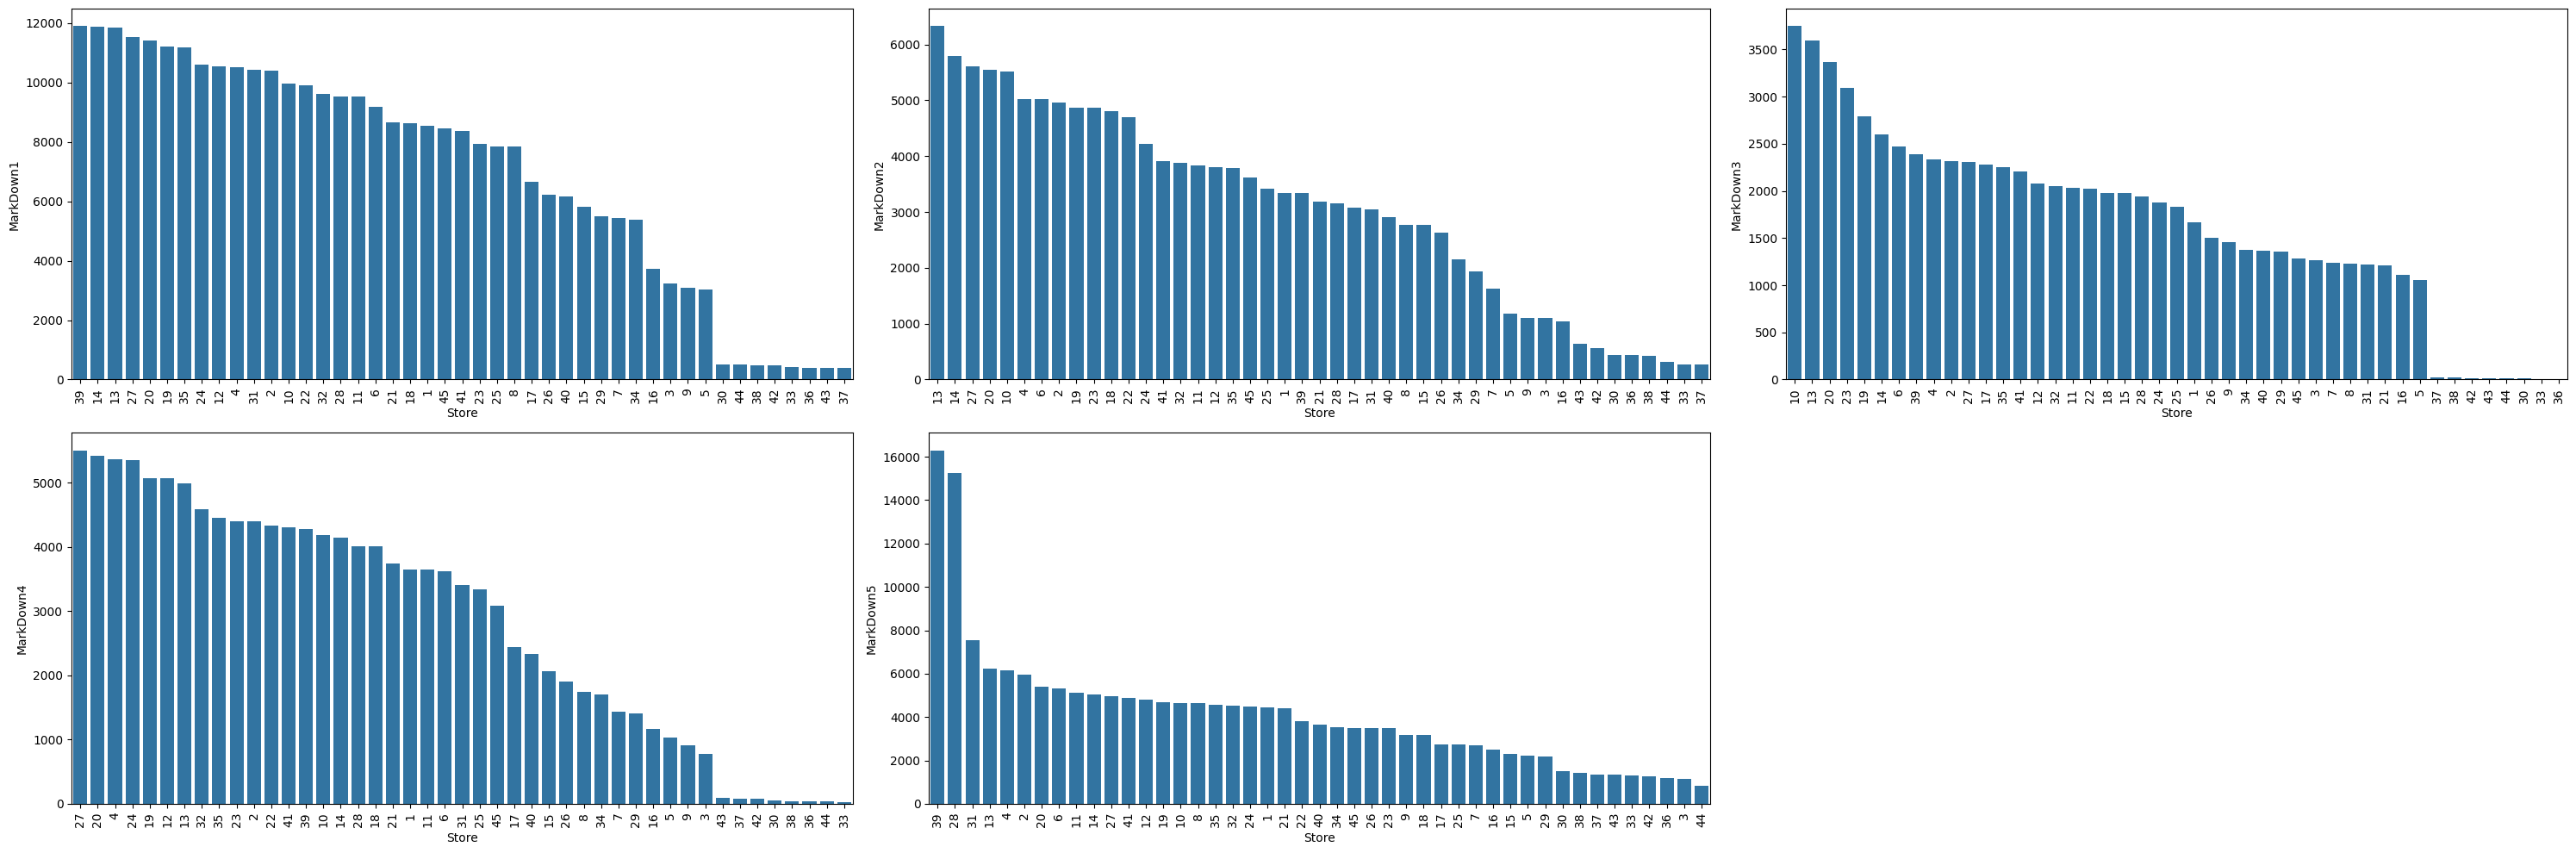

In [ ]:
# checking the markdown column if there is any pattern
markdown_col = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

fig, axes = plt.subplots(2, 3, figsize=(30, 10))

for i,col in enumerate(markdown_col,0):
  row, col_pos = divmod(i, 3) #This figures out where to place the plot in the 2x3 grid
  dis = feature_data.groupby('Store')[col].mean().reset_index()
  dis = dis.sort_values(col, ascending=False)

  sns.barplot(x = 'Store',y = col, data = dis,ci = None,order=dis['Store'],ax=axes[row][col_pos])
  axes[row][col_pos].tick_params(axis='x', rotation=90) #it will rotate the store labels so they don’t overlap

fig.delaxes(axes[1,2]) #removes the extra (empty) plot in the last position
plt.tight_layout()
plt.show()


All the graphs are allmost similar in ratio. so merging them using PCA

In [ ]:
# Merging the Markdown columns using PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

mark_downs = data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)
mark_downs_scaled = StandardScaler().fit_transform(mark_downs)

pca = PCA(n_components=1)
data['MarkDown'] = pca.fit_transform(mark_downs_scaled)

# droping the seperate columns
data.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)

In [ ]:
data.set_index('Date', inplace=True) # making Date column as index

In [ ]:
data.head(1)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,MarkDown
Date,,,,,,,,,,,
2010-02-05,1,1.0,24924.5,False,42.31,2.572,211.096358,8.106,A,151315,-0.639788


Doing basic checks

In [ ]:
data.shape # shape of data

(423325, 11)

In [ ]:
data.info() # checking rows entries, datapoint present, data type information

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 423325 entries, 2010-02-05 to 2013-07-26
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Dept          421570 non-null  float64
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     423325 non-null  bool   
 4   Temperature   423325 non-null  float64
 5   Fuel_Price    423325 non-null  float64
 6   CPI           422740 non-null  float64
 7   Unemployment  422740 non-null  float64
 8   Type          423325 non-null  object 
 9   Size          423325 non-null  int64  
 10  MarkDown      423325 non-null  float64
dtypes: bool(1), float64(7), int64(2), object(1)
memory usage: 35.9+ MB


In [ ]:
data.isnull().sum() #checking null values

,0
Store,0
Dept,1755
Weekly_Sales,1755
IsHoliday,0
Temperature,0
Fuel_Price,0
CPI,585
Unemployment,585
Type,0
Size,0


In [ ]:
data.duplicated().sum() #checking duplicate values

np.int64(0)

Visualization

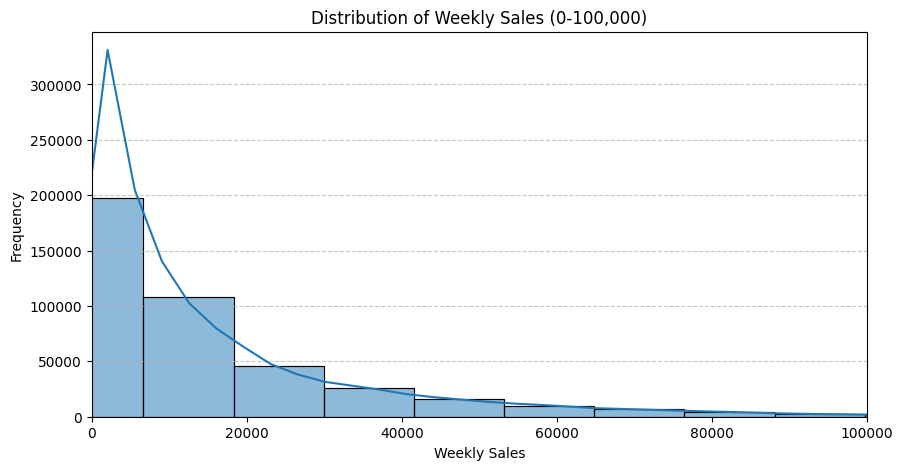

In [ ]:
plt.figure(figsize=(10, 5))  # Slightly larger figure for better visibility
sns.histplot(data['Weekly_Sales'], bins=60, kde=True)
plt.title('Distribution of Weekly Sales (0-100,000)')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.xlim(0, 100000)  # Setting x-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


this is the overall weakly sales according to the dataset

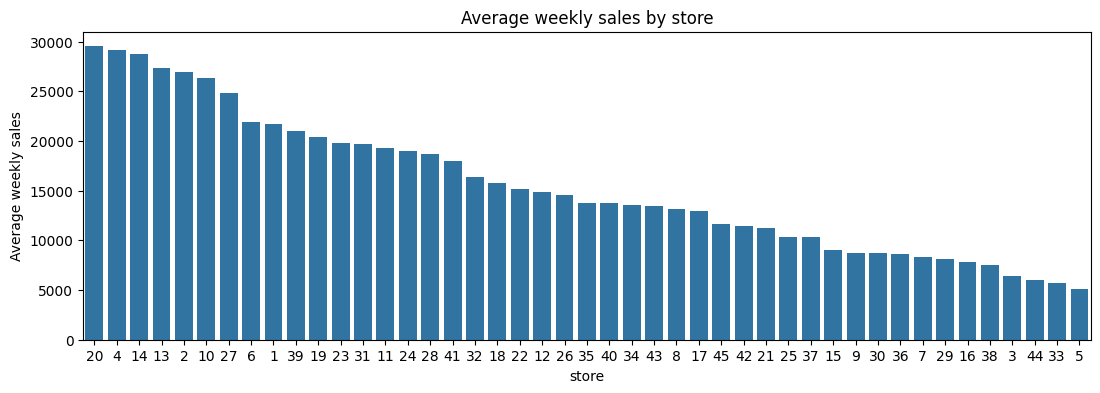

In [ ]:
# Checking the average weekly sale of stores
avg_sales = data.groupby('Store',)['Weekly_Sales'].mean().reset_index() #grouped data according to Store and weekly sales
avg_sales = avg_sales.sort_values(by='Weekly_Sales', ascending=False) #sorting values according to weekly sales so that graph looks better

plt.figure(figsize=(13,4))
sns.barplot(x ='Store', y = 'Weekly_Sales', data = avg_sales,order=avg_sales['Store'],ci = None)
plt.title('Average weekly sales by store')
plt.xlabel('store')
plt.ylabel('Average weekly sales')
plt.tight_layout
plt.show()

1. According to the arrangement of the store in this graph, the weakly sales above the store 17 is very low

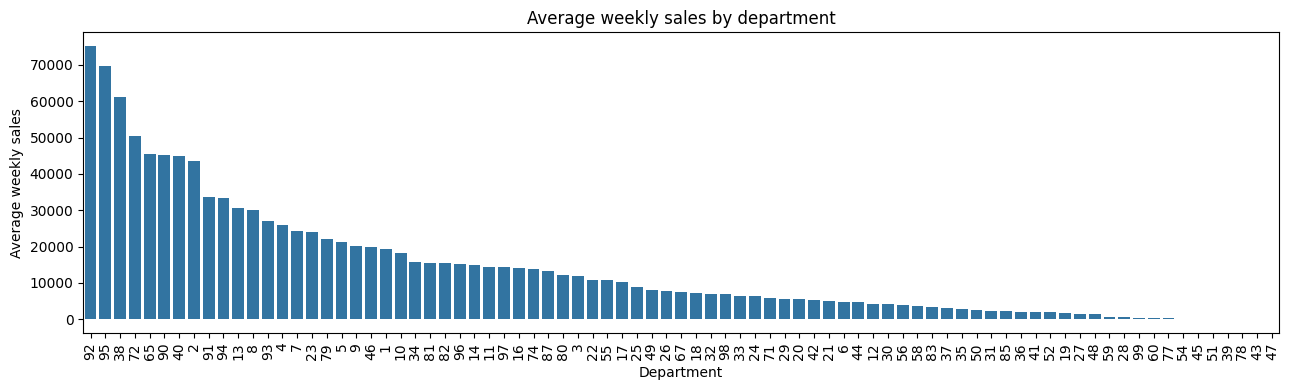

In [ ]:
# Grouping and sorting
avg_sales = data.groupby('Dept')['Weekly_Sales'].mean().reset_index()
avg_sales = avg_sales.sort_values('Weekly_Sales', ascending=False)

avg_sales['Dept'] = avg_sales['Dept'].astype(int).astype(str)# Convert 'Dept' to string to avoid decimals in x-axis labels

plt.figure(figsize=(13, 4))
sns.barplot(x='Dept', y='Weekly_Sales', order=avg_sales['Dept'], data=avg_sales, ci=None)
plt.title('Average weekly sales by department')
plt.xlabel('Department')
plt.ylabel('Average weekly sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


1. According to the arrangement of the department in this graph, the weakly sales above the department 10 is very low

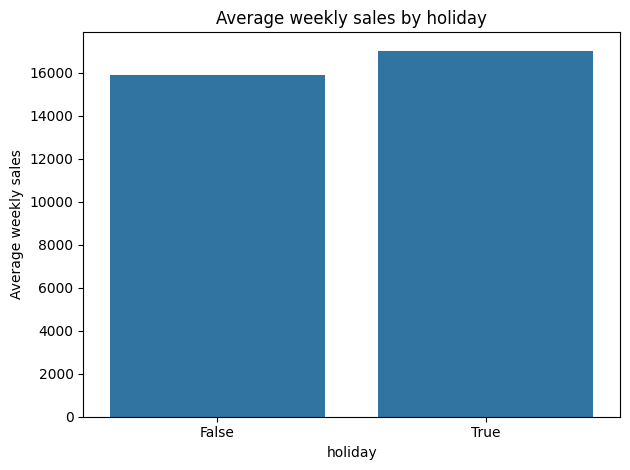

In [ ]:
# Checking the average weekly sale according to holiday
avg_sales = data.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index() #grouped data according to holiday and weekly sales
avg_Sales = avg_sales.sort_values(by = 'Weekly_Sales',ascending = False) #sorting values according to weekly sales so that graph looks better

sns.barplot(x = 'IsHoliday',y = 'Weekly_Sales', data = avg_sales,ci = None)
plt.title('Average weekly sales by holiday')
plt.xlabel('holiday')
plt.ylabel('Average weekly sales')
plt.tight_layout()
plt.show()


1. Average weekly sales in holidays is more as compare to other days.

Store Analysis

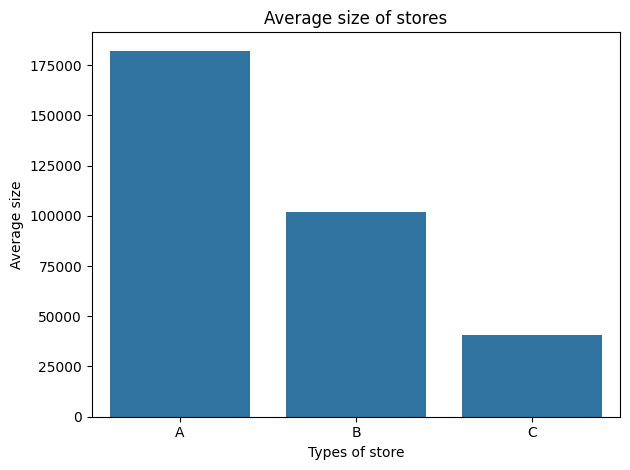

In [ ]:
df = data.groupby('Type')['Size'].mean().reset_index() #grouped data according to Type of store and its average size
df = df.sort_values(by = 'Size',ascending = False) #sorting values according to size so that graph looks better

sns.barplot(x = 'Type',y = 'Size', data =df,ci = None)
plt.title('Average size of stores')
plt.xlabel('Types of store')
plt.ylabel('Average size')
plt.tight_layout()
plt.show()


1. the 'A' type store size is larger other's type, then comes 'B' type and 'c' type is smallest.



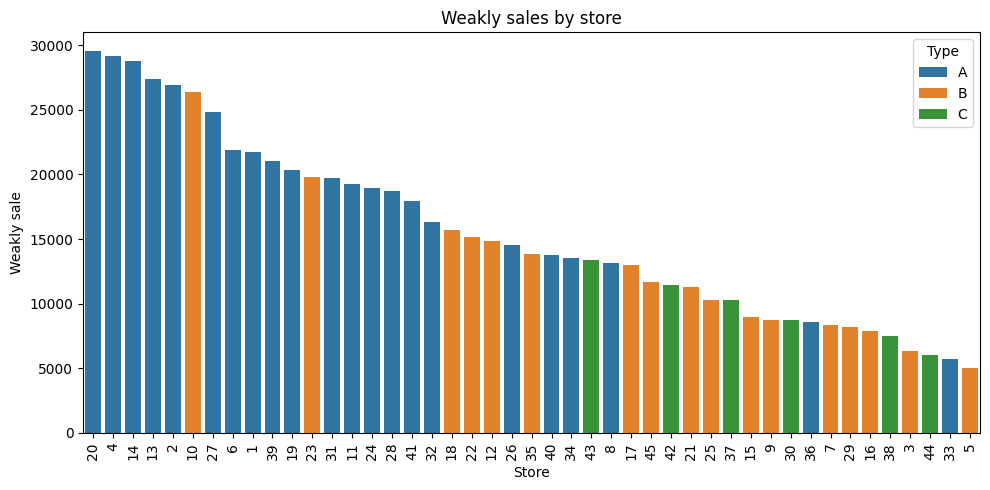

In [ ]:
avg_sales = data.groupby(['Store','Type'])['Weekly_Sales'].mean().reset_index() #grouped data according to Type of store and its average size
avg_Sales = avg_sales.sort_values( 'Weekly_Sales',ascending = False) #sorting values according to size so that graph looks better

plt.figure(figsize=(10,5))
sns.barplot(x = 'Store',y = 'Weekly_Sales',order = avg_Sales['Store'], data = avg_sales,ci = None,hue ='Type')
plt.title('Weakly sales by store')
plt.xlabel('Store')
plt.ylabel('Weakly sale')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


1. generally Type A stores has higher value of sales,

Time Series Analysis

In [ ]:
data= data.reset_index()

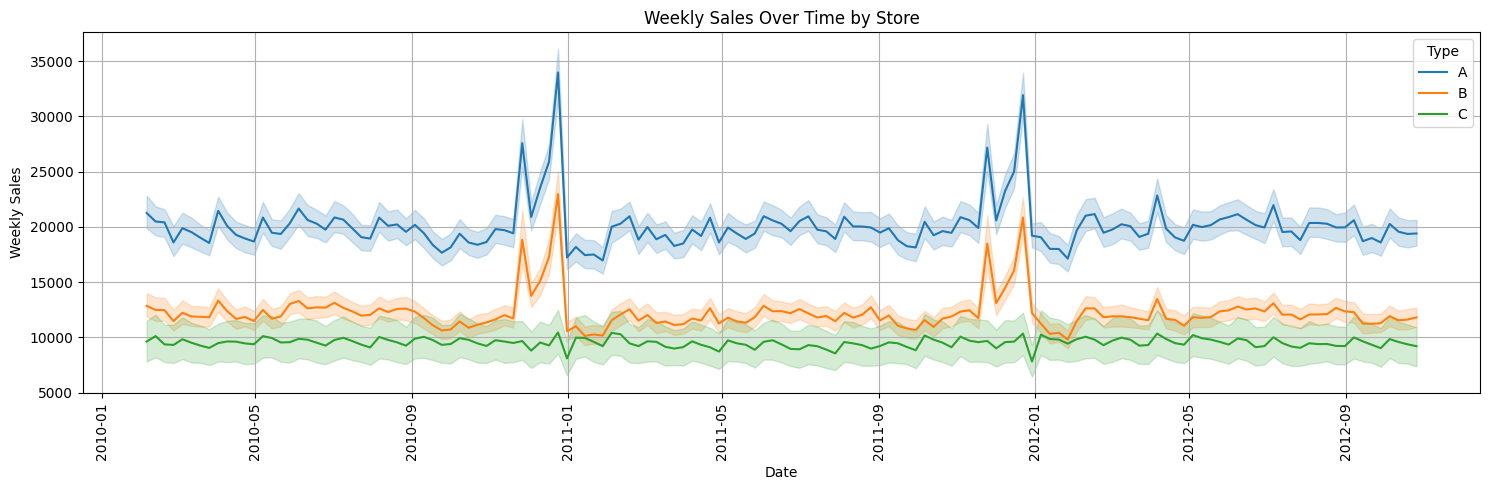

In [ ]:
# Plotting the weekly sales graph according to the types of stores
plt.figure(figsize=(15,5))

sns.lineplot(x='Date', y='Weekly_Sales', hue='Type', data=data)
plt.title('Weekly Sales Over Time by Store')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.grid(True)
plt.show()


1.The weakly Sales of type A store in peak time is arround 33k    
2.The weakly Sales of type B store in peak time is arround 20k   
3.The weakly Sales of type C store is around 10k

In [ ]:
# Plotting the weekly sales by each store
store_type_map = data.groupby('Store')['Type'].first() # Get each store's typecA, B, C

sorted_stores = store_type_map.sort_values().index # Sort store IDs by Type A → B → C

# Plotting weekly sales for each store
for store_id in sorted_stores:
    store_data = data[data['Store'] == store_id]
    store_type = store_type_map[store_id]

    plt.figure(figsize=(10, 5))
    sns.lineplot(x='Date', y='Weekly_Sales', data=store_data)
    plt.title(f'Weekly Sales Over Time for Store {store_id} (Type {store_type})')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

***Type(A)***  
1.there is slight inrease in weakly sale over time in store 4    
2.there is slight decrese in weakly sale over time in store 14   
3.there is clear decrese in weakly sale over time in store 36    
4.there is slight inrease in weakly sale over time in store 39  
5 other than this there is no improvement in A type stores over time

***Type(B)***  
1.there is slight inrease in weakly sale over time in store 7  
2 other than this there is no improvement in B type stores over time  

***Type(C)***  
1.there is slight inrease in weakly sale over time in store 38   
2.there is slight inrease in weakly sale over time in store 44  
3 other than this there is no improvement in C type stores over time

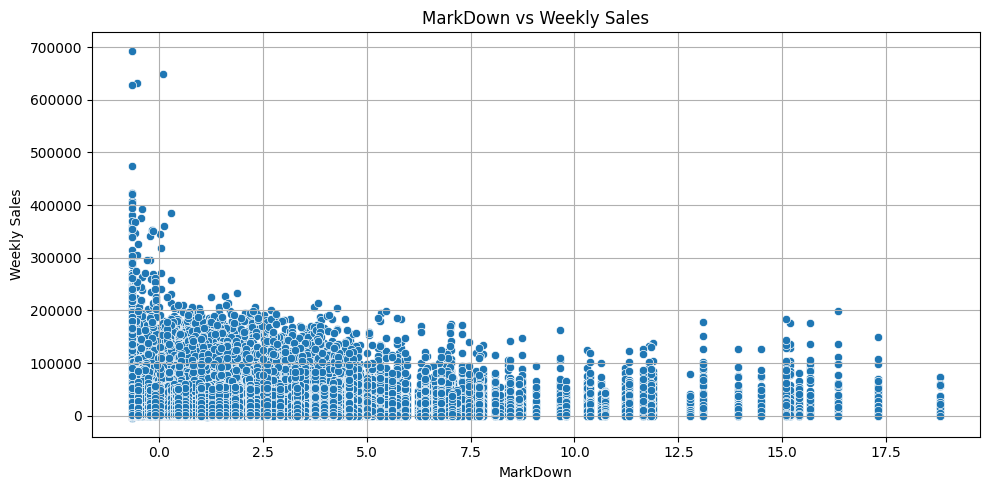

In [ ]:
# Checking MarkDown relation
plt.figure(figsize=(10, 5))
sns.scatterplot(x='MarkDown', y='Weekly_Sales', data=data)
plt.title('MarkDown vs Weekly Sales')
plt.xlabel('MarkDown')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

As the markdown price increases the weakly sale decreses. there may be following reasons-:  
1. we dont have to cut down the price of  the product which is already in high demand and customer is ready to pay full price of it like- iphone. etc.
2. we have to cut down the price of the product which is not liked by the buyers for different reasons, so instead of giving discount on such products customer don't buy it.

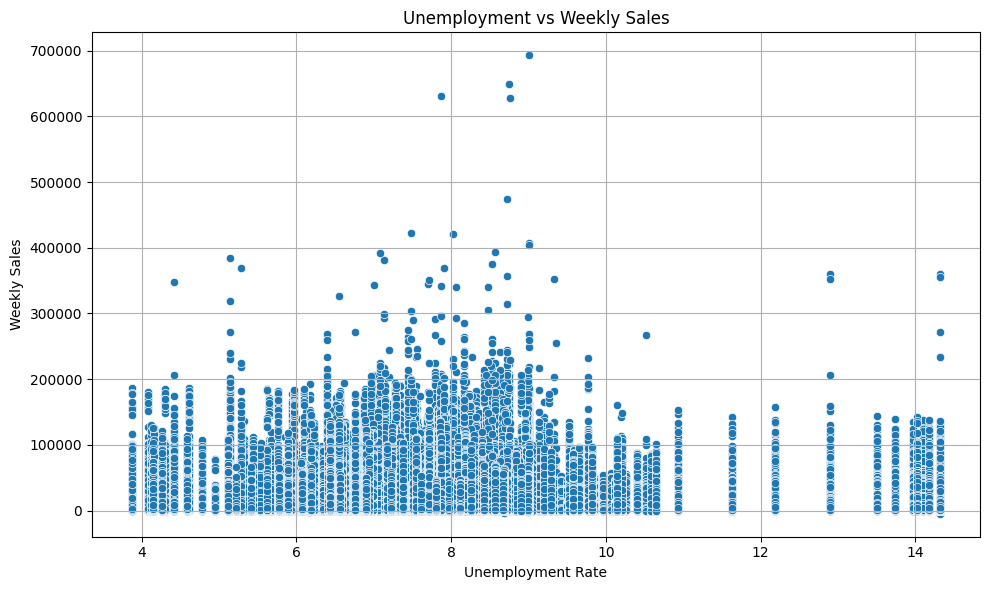

In [ ]:
# Checking Unemployment relation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.title('Unemployment vs Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
data.head(1)

,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,MarkDown
0,2010-02-05,1,1.0,24924.5,False,42.31,2.572,211.096358,8.106,A,151315,-0.639788


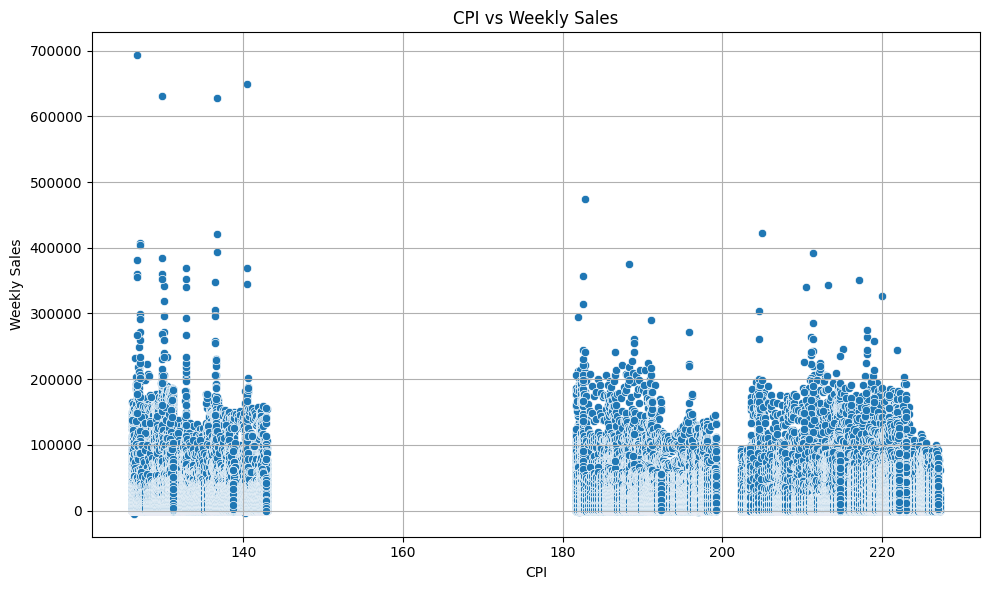

In [ ]:
# Checking CPI relation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)
plt.title('CPI vs Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


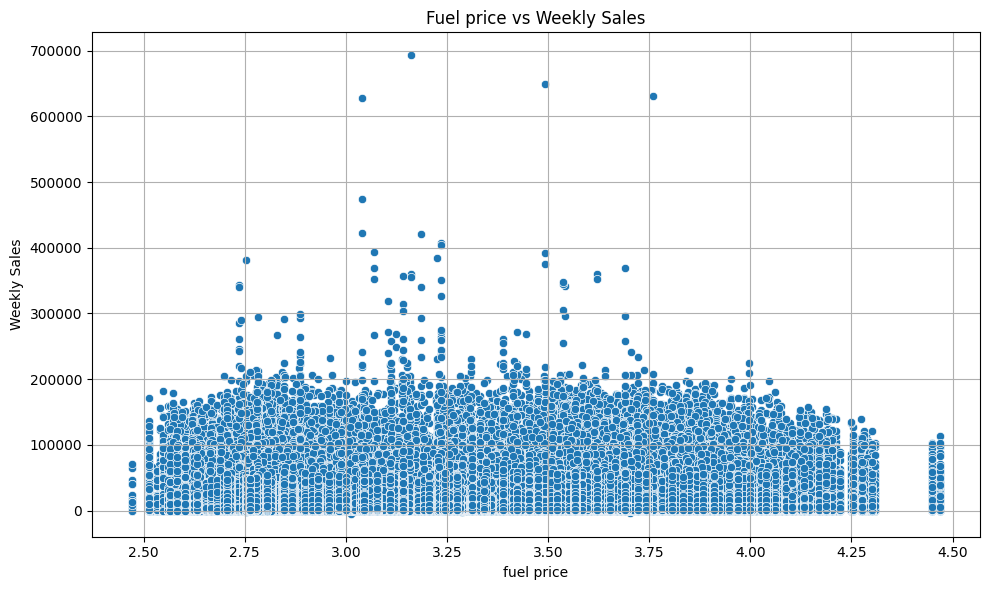

In [ ]:
# Checking Fuel_Price relation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data)
plt.title('Fuel price vs Weekly Sales')
plt.xlabel('fuel price')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


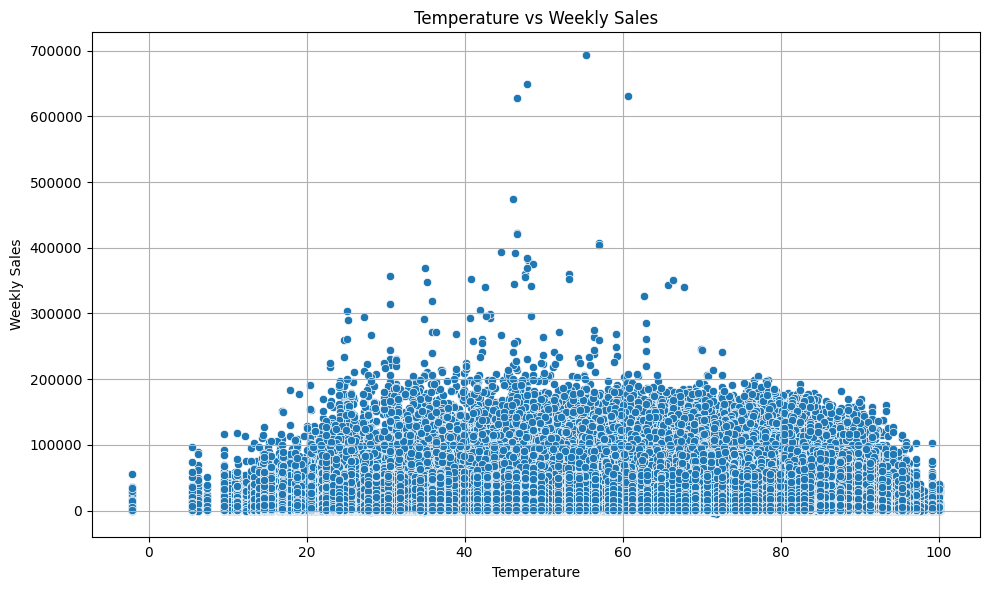

In [ ]:
# Checking Temperature relation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


1. there is no relation of Temperature, Fuel price, Unemployment with weakly sales

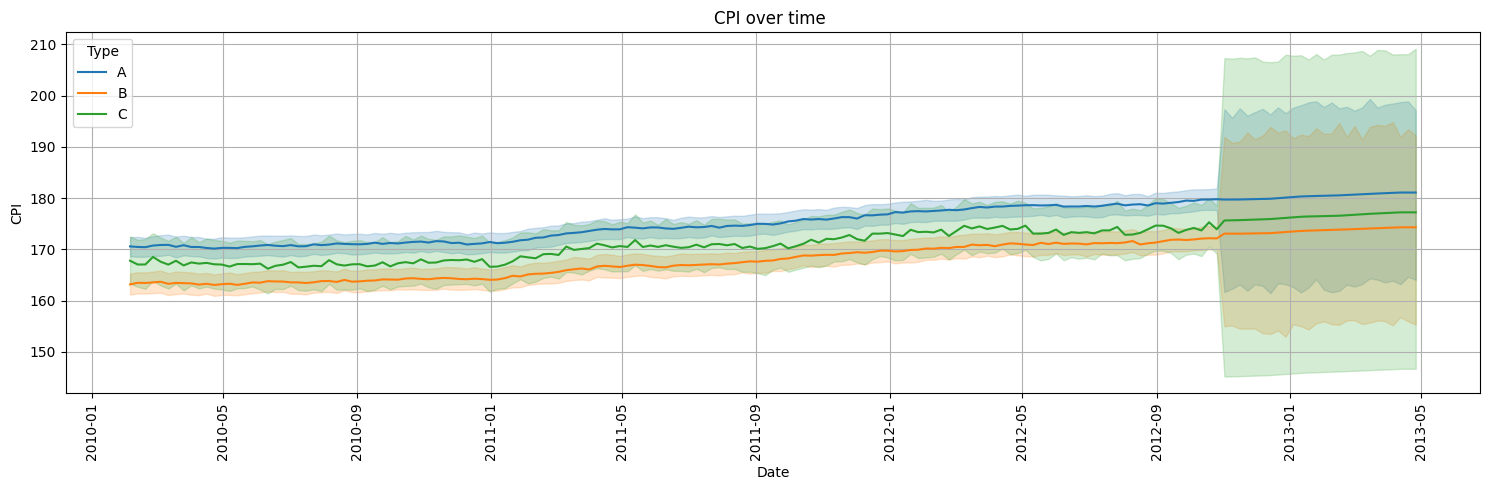

In [ ]:
# Plotting the weekly sales graph according to the types of stores
plt.figure(figsize=(15,5))

sns.lineplot(x='Date', y='CPI', hue='Type', data=data)
plt.title('CPI over time ')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('CPI')
plt.tight_layout()
plt.grid(True)
plt.show()


this graph show the price of goods or services increases rapidly from 2011

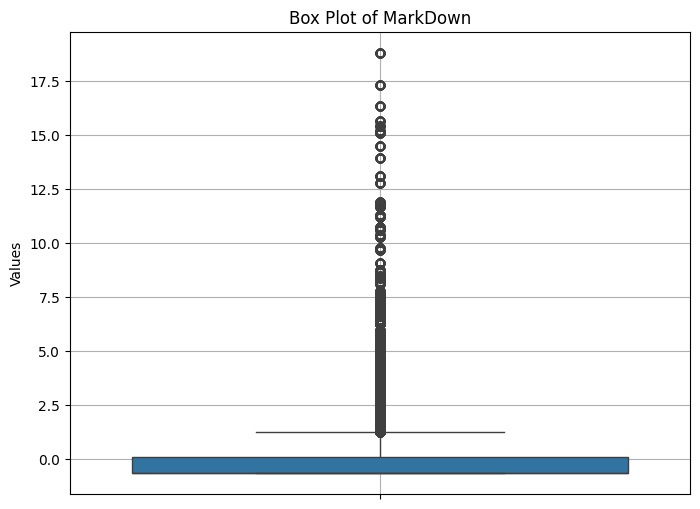

In [ ]:
# Checking outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['MarkDown'])
plt.title('Box Plot of MarkDown')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [ ]:
data = data[data['MarkDown'] <= 10.0]

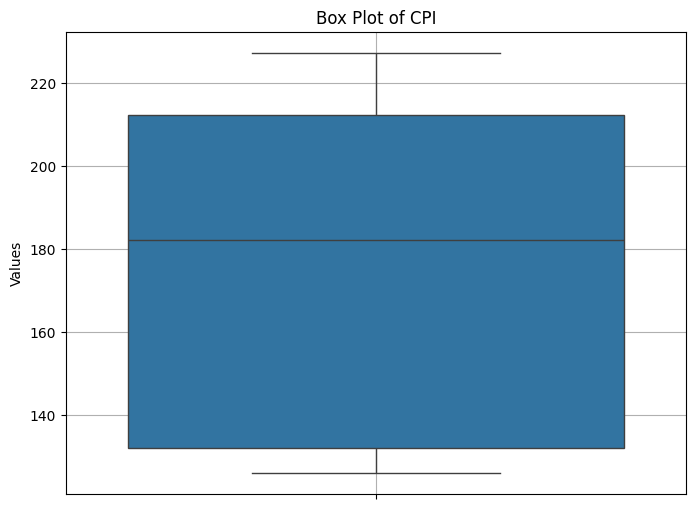

In [ ]:
# Checking outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['CPI'])
plt.title('Box Plot of CPI')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [ ]:
# ADfuller Test to check stationarity

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.Weekly_Sales, maxlag = 10)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -119.07178591234006
2. P-Value :  0.0
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 420039
5. Critical Values :
	 1% :  -3.430365568411417
	 5% :  -2.8615468810517126
	 10% :  -2.566773662532973


p-value is less then 0.05 so the data is stationary